# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('GermanCredit.xlsx')
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [2]:
df.shape

(1000, 3)

In [3]:
Records = df.shape[0]
Records

1000

# 3. Plot Histogram for column 'CreditAmount'

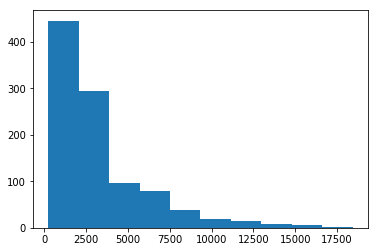

In [4]:
plt.hist(df['CreditAmount'])
plt.show()

# 3b. Create creditability dataframe

In [5]:
creditability = df['Creditability']
creditability = pd.DataFrame(creditability)
creditability.head()

,Creditability
0,1
1,1
2,1
3,1
4,1


In [6]:
df.drop('Creditability',axis=1,inplace=True)
df.head()

,CreditAmount,DurationOfCreditInMonths
0,1049,18
1,2799,9
2,841,12
3,2122,12
4,2171,12


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [7]:
data = pd.concat([df,creditability],axis=1)
data.head()

,CreditAmount,DurationOfCreditInMonths,Creditability
0,1049,18,1
1,2799,9,1
2,841,12,1
3,2122,12,1
4,2171,12,1


In [8]:
data.groupby('Creditability')['CreditAmount'].sum()

Creditability
0    1181438
1    2089810
Name: CreditAmount, dtype: int64

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

In [9]:
### Separate class for 0 and 1

In [10]:

class_count_0, class_count_1 = data['Creditability'].value_counts()

class_0 = data[data['Creditability'] == 0]
class_1 = data[data['Creditability'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (300, 3)
class 1: (700, 3)


In [11]:
class_0.head()

,CreditAmount,DurationOfCreditInMonths,Creditability
22,2384,36,0
45,1216,18,0
47,1864,18,0
97,4455,36,0
110,3959,15,0


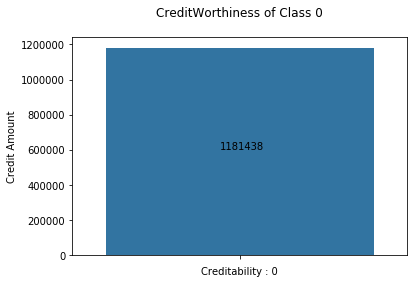

In [12]:
sns.barplot(data=class_0,y=class_0['CreditAmount'].sum())
plt.title("CreditWorthiness of Class 0\n")
plt.ylabel('Credit Amount')
plt.xlabel('Creditability : 0')
plt.text(-0.06, 600000, s=str(class_0['CreditAmount'].sum()))
plt.show()

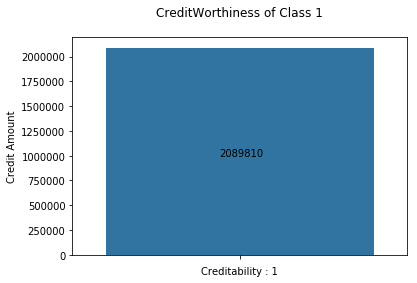

In [13]:
sns.barplot(data=class_0,y=class_1['CreditAmount'].sum())
plt.title("CreditWorthiness of Class 1\n")
plt.ylabel('Credit Amount')
plt.xlabel('Creditability : 1')
plt.text(-0.06, 1000000, s=str(class_1['CreditAmount'].sum()))
plt.show()

### CreditWorthiness for Both the Classes Together

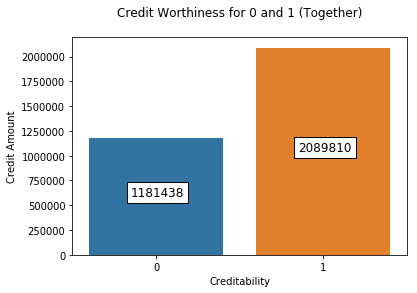

In [14]:
cred_0 = data.groupby('Creditability')['CreditAmount'].sum()[0]
cred_1 = data.groupby('Creditability')['CreditAmount'].sum()[1]

sns.barplot(data=data,x=[0,1],y=[cred_0,cred_1])
plt.text(-0.15, cred_0/2, s=str(cred_0), fontsize=12,bbox=dict(facecolor='white', alpha=1))
plt.text(0.85, cred_1/2, s=str(cred_1), fontsize=12,bbox=dict(facecolor='white', alpha=1))
plt.title("Credit Worthiness for 0 and 1 (Together)\n")
plt.xlabel('Creditability')
plt.ylabel('Credit Amount')

plt.show()

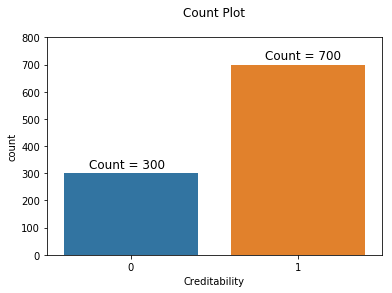

In [15]:
sns.countplot(creditability['Creditability'])
plt.title("Count Plot\n")
plt.yticks([i for i in range(0,creditability['Creditability'].value_counts()[1]+200,100)])
plt.text(-0.25, 320, s='Count = '+str(creditability['Creditability'].value_counts()[0]), fontsize=12)
plt.text(0.8, 720, s='Count = '+str(creditability['Creditability'].value_counts()[1]), fontsize=12)
plt.show()

# 6. Prepare input data for the model

In [16]:
data.head()

,CreditAmount,DurationOfCreditInMonths,Creditability
0,1049,18,1
1,2799,9,1
2,841,12,1
3,2122,12,1
4,2171,12,1


### Credit Amount

In [17]:
print('Skewness = ',data['CreditAmount'].skew())

# Logarithmic Transformation
print("Log Skew = ",np.log(data['CreditAmount']).skew())

# Sqrt Transformation
print("Sqrt Skew = ",np.sqrt(data['CreditAmount']).skew())

# So we can conclude that Logarithmic Transformation is best suitable as it has less skewness

Skewness =  1.9495942869127831
Log Skew =  0.1291343680786358
Sqrt Skew =  1.0402754694829142


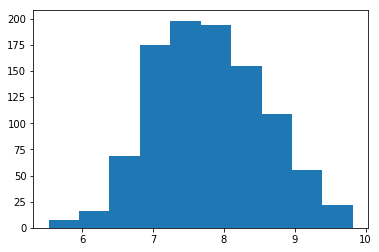

In [18]:
plt.hist(np.log(data['CreditAmount']))
plt.show()

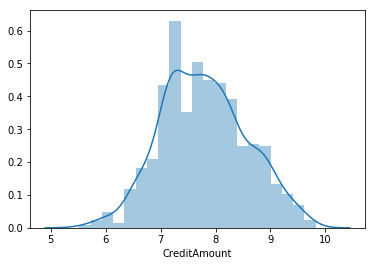

In [19]:
sns.distplot(np.log(data['CreditAmount']))
plt.show()

### Fixing Log Transformation

In [20]:
data['Log_CreditAmount'] = np.log(data['CreditAmount'])
data.head()

,CreditAmount,DurationOfCreditInMonths,Creditability,Log_CreditAmount
0,1049,18,1,6.955593
1,2799,9,1,7.937017
2,841,12,1,6.734592
3,2122,12,1,7.660114
4,2171,12,1,7.682943


In [21]:
np.var(data['Log_CreditAmount'])

0.6023644251098232

In [22]:
np.std(data['Log_CreditAmount'])

0.7761213984357236

### DurationOfCreditInMonths

In [23]:
data['DurationOfCreditInMonths'].unique()

array([18,  9, 12, 10,  8,  6, 24, 11, 30, 48, 36, 15, 42, 21, 27, 33, 28,
        4, 47, 14, 39, 60,  5, 22, 54, 13, 16,  7, 20, 26, 45, 72, 40],
      dtype=int64)

In [24]:
data['DurationOfCreditInMonths'].nunique()

33

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(data['DurationOfCreditInMonths'])
data['DurationOfCreditInMonths'] = le.transform(data['DurationOfCreditInMonths'])

### Target Variable (Creditability)

In [26]:
data['Creditability'].value_counts()

data['Creditability'].value_counts(normalize=True)

1    0.7
0    0.3
Name: Creditability, dtype: float64

##### Here the Data is Not Balanced.

In [27]:
from imblearn.over_sampling import SMOTE

ros = SMOTE(random_state=42)

x = data.drop(['CreditAmount','Creditability'],axis=1)
y = data['Creditability']
# fit predictor and target variable

x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape\n', data['Creditability'].value_counts())


Using TensorFlow backend.


Original dataset shape
 1    700
0    300
Name: Creditability, dtype: int64


In [28]:
y_ros = pd.DataFrame(y_ros)
y_ros['Creditability'].value_counts()

1    700
0    700
Name: Creditability, dtype: int64

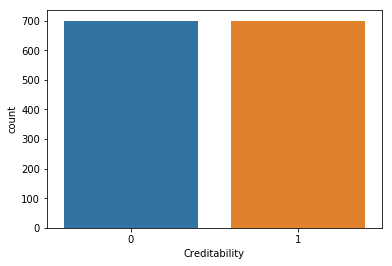

In [29]:
sns.countplot(y_ros['Creditability'])
plt.show()

#### Now the Data is Balanced With Equal number of 0's and 1's.

In [30]:
bal_data = pd.concat([x_ros,y_ros],axis=1)
bal_data.head()

,DurationOfCreditInMonths,Log_CreditAmount,Creditability
0,13,6.955593,1
1,5,7.937017,1
2,8,6.734592,1
3,8,7.660114,1
4,8,7.682943,1


# 7. Fit logistic regression model

In [31]:
## Two Ways

x = bal_data.drop('Creditability',axis=1)
y = bal_data['Creditability']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=57)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(x_train,y_train)

logreg.score(x_test,y_test)

0.6542857142857142

In [32]:
import statsmodels.api as sm
from statsmodels.api import Logit

x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

logreg1 = Logit(y_train.values,x_train_)
res = logreg1.fit()

res.summary()

Optimization terminated successfully.
         Current function value: 0.666383
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1050
Model:                          Logit   Df Residuals:                     1047
Method:                           MLE   Df Model:                            2
Date:                Fri, 12 Aug 2022   Pseudo R-squ.:                 0.03841
Time:                        12:20:44   Log-Likelihood:                -699.70
converged:                       True   LL-Null:                       -727.65
Covariance Type:            nonrobust   LLR p-value:                 7.281e-13
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8596      0.744     -1.155      0.248      -2.318       0.599
DurationOfCreditInMonths    -0.0772      0.012     -6.614      0.000      -0.100      -0.054
Log_CreditAmount             0.2476      0.108      2.291      0.022       0.036       0.459
============================================================================================
"""

# 8. Test accuracy calculation

In [33]:
logreg.score(x_test,y_test)

0.6542857142857142

In [34]:
## Acc for Logit

y_pred_prob = res.predict(x_test_)

y_pred = [0 if i<0.5 else 1 for i in y_pred_prob]

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6542857142857142

In [35]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred)

0.6451612903225806

# 9. Build a confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[119,  47],
       [ 74, 110]], dtype=int64)

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

[[-0.07694832  0.24471049]] [-0.83986739]


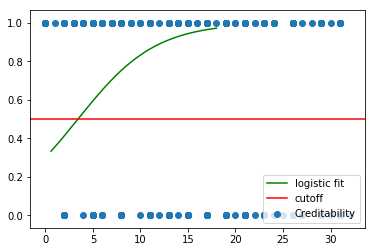

In [37]:

from scipy.special import expit
 
x_test = np.linspace(18,0.6,350)
print(logreg.coef_,logreg.intercept_)
#DurationOfCreditInMonths 	Log_CreditAmount
# predict dummy y_test data based on the logistic model
y_testt = x_test * logreg.coef_[0][1] + logreg.intercept_
 
sigmoid = expit(y_testt)
plt.scatter(data['DurationOfCreditInMonths'],data['Creditability'])
 
# ravel to convert the 2-d array to a flat array
plt.plot(x_test,sigmoid.ravel(),c="green", label = "logistic fit")
plt.yticks([0, 0.2, 0.4, 0.6,0.8,1])
plt.axhline(.5, color="red", label="cutoff")
plt.legend(loc="lower right")
plt.show()

[[-0.07694832  0.24471049]] [-0.83986739]


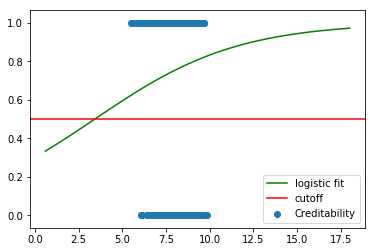

In [38]:

from scipy.special import expit
 
x_test = np.linspace(18,0.6,350)
print(logreg.coef_,logreg.intercept_)
#DurationOfCreditInMonths 	Log_CreditAmount
# predict dummy y_test data based on the logistic model
y_testt = x_test * logreg.coef_[0][1] + logreg.intercept_
 
sigmoid = expit(y_testt)
plt.scatter(data['Log_CreditAmount'],data['Creditability'])
 
# ravel to convert the 2-d array to a flat array
plt.plot(x_test,sigmoid.ravel(),c="green", label = "logistic fit")
plt.yticks([0, 0.2, 0.4, 0.6,0.8,1])
plt.axhline(.5, color="red", label="cutoff")
plt.legend(loc="lower right")
plt.show()

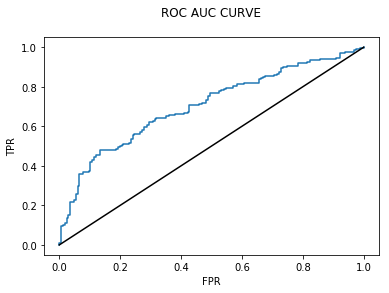

In [39]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,th = roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr)
plt.plot([0,1],color='black')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC CURVE\n')
plt.show()